# jieba分词

In [1]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式
# Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式
# Default Mode: 我/ 来到/ 北京/ 清华大学

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\LM216\AppData\Local\Temp\jieba.cache
Loading model cost 2.047 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学


In [2]:
import jieba
content = 'I have a dream that one day \
this nation will rise up and live out the \
true meaning of its creed: "We hold these \
truths to be self-evident, that all men are created equal."'
seg_list = jieba.cut(content)
stopwords = ['a','the','that',' ','"',':','of','to','-',',','be','.','this','will','its','these','are','was','\n']
final=[]
for seg in seg_list:
    if seg not in stopwords:
        final.append(seg)
print(len(final),",".join(final))

23 I,have,dream,one,day,nation,rise,up,and,live,out,true,meaning,creed,We,hold,truths,self,evident,all,men,created,equal


In [3]:
import jieba
text ='''
"It was the best of times,
it was the worst of times,
it was the age of wisdom,
it was the age of foolishness."
'''
seg_list = jieba.cut(text.lower())
stopwords = ['a','the','that',' ','"',':','of',
             'to','-',',','be','.','this','will',
             'its','these','are','was','\n']
final=[]
for seg in seg_list:
    if seg not in stopwords:
        final.append(seg)
print(len(final),",".join(final))
word_dict = {}
for word in final:
    if word in word_dict:  # word已经出现过，将计数增加1
        word_dict[word] += 1
    else:  # word还没有出现过，创建新的键值对
        word_dict[word] = 1
print(word_dict)

12 it,best,times,it,worst,times,it,age,wisdom,it,age,foolishness
{'it': 4, 'best': 1, 'times': 2, 'worst': 1, 'age': 2, 'wisdom': 1, 'foolishness': 1}


# 基于TF-IDF算法进行关键词抽取

In [2]:
from jieba import analyse
# 引入TF-IDF关键词抽取接口
tfidf = analyse.extract_tags

# 原始文本
text = "线程是程序执行时的最小单位，它是进程的一个执行流，\
        是CPU调度和分派的基本单位，一个进程可以由很多个线程组成，\
        线程间共享进程的所有资源，每个线程有自己的堆栈和局部变量。\
        线程由CPU独立调度执行，在多CPU环境下就允许多个线程同时运行。\
        同样多线程也可以实现并发操作，每个请求分配一个线程来处理。"

# 基于TF-IDF算法进行关键词抽取
keywords = tfidf(text)
print("keywords by tfidf:") 
# 输出抽取出的关键词
for keyword in keywords:
    print(keyword ,end="/")

keywords by tfidf:
线程/CPU/进程/调度/多线程/程序执行/每个/执行/堆栈/局部变量/单位/并发/分派/一个/共享/请求/最小/可以/允许/分配/

In [6]:
from pyecharts.charts import WordCloud
import pandas as pd
from pyecharts import options as opts
data = [
    ("生活资源", "999"),
    ("供热管理", "888"),
    ("供气质量", "777"),
    ("生活用水管理", "688"),
    ("一次供水问题", "588"),
    ("交通运输", "516"),
    ("城市交通", "515"),
    ("环境保护", "483"),
    ("房地产管理", "462"),
    ("城乡建设", "449"),
    ("社会保障与福利", "429"),
    ("社会保障", "407"),
    ("文体与教育管理", "406"),
    ("公共安全", "406"),
    ("公交运输管理", "386"),
    ("出租车运营管理", "385"),
    ("供热管理", "375"),
    ("市容环卫", "355"),
    ("自然资源管理", "355"),
    ("粉尘污染", "335"),
    ("噪声污染", "324"),
    ("土地资源管理", "304"),
    ("物业服务与管理", "304"),
    ("医疗卫生", "284"),
    ("粉煤灰污染", "284"),
    ("占道", "284"),
    ("供热发展", "254"),
    ("农村土地规划管理", "254"),
    ("生活噪音", "253"),
    ("供热单位影响", "253"),
    ("城市供电", "223"),
    ("房屋质量与安全", "223"),
    ("大气污染", "223"),
    ("房屋安全", "223"),
    ("文化活动", "223"),
    ("拆迁管理", "223"),
    ("公共设施", "223"),
    ("供气质量", "223"),
    ("供电管理", "223"),
    ("燃气管理", "152"),
    ("教育管理", "152"),
    ("医疗纠纷", "152"),
    ("执法监督", "152"),
    ("设备安全", "152"),
    ("政务建设", "152"),
    ("县区、开发区", "152"),
    ("宏观经济", "152"),
    ("教育管理", "112"),
    ("社会保障", "112"),
    ("生活用水管理", "112"),
    ("物业服务与管理", "112"),
    ("分类列表", "112"),
    ("农业生产", "112"),
    ("二次供水问题", "112"),
    ("城市公共设施", "92"),
    ("拆迁政策咨询", "92"),
    ("物业服务", "92"),
    ("物业管理", "92"),
    ("社会保障保险管理", "92"),
    ("低保管理", "92"),
    ("文娱市场管理", "72"),
    ("城市交通秩序管理", "72"),
    ("执法争议", "72"),
    ("商业烟尘污染", "72"),
    ("占道堆放", "71"),
    ("地上设施", "71"),
    ("水质", "71"),
    ("无水", "71"),
    ("供热单位影响", "71"),
    ("人行道管理", "71"),
    ("主网原因", "71"),
    ("集中供热", "71"),
    ("客运管理", "71"),
    ("国有公交（大巴）管理", "71"),
    ("工业粉尘污染", "71"),
    ("治安案件", "71"),
    ("压力容器安全", "71"),
    ("身份证管理", "71"),
    ("群众健身", "41"),
    ("工业排放污染", "41"),
    ("破坏森林资源", "41"),
    ("市场收费", "41"),
    ("生产资金", "41"),
    ("生产噪声", "41"),
    ("农村低保", "41"),
    ("劳动争议", "41"),
    ("劳动合同争议", "41"),
    ("劳动报酬与福利", "41"),
    ("医疗事故", "21"),
    ("停供", "21"),
    ("基础教育", "21"),
    ("职业教育", "21"),
    ("物业资质管理", "21"),
    ("拆迁补偿", "21"),
    ("设施维护", "21"),
    ("市场外溢", "11"),
    ("占道经营", "11"),
    ("树木管理", "11"),
    ("农村基础设施", "11"),
    ("无水", "11"),
    ("供气质量", "11"),
    ("停气", "11"),
    ("市政府工作部门（含部门管理机构、直属单位）", "11"),
    ("燃气管理", "11"),
    ("市容环卫", "11"),
    ("新闻传媒", "11"),
    ("人才招聘", "11"),
    ("市场环境", "11"),
    ("行政事业收费", "11"),
    ("食品安全与卫生", "11"),
    ("城市交通", "11"),
    ("房地产开发", "11"),
    ("房屋配套问题", "11"),
    ("物业服务", "11"),
    ("物业管理", "11"),
    ("占道", "11"),
    ("园林绿化", "11"),
    ("户籍管理及身份证", "11"),
    ("公交运输管理", "11"),
    ("公路（水路）交通", "11"),
    ("房屋与图纸不符", "11"),
    ("有线电视", "11"),
    ("社会治安", "11"),
    ("林业资源", "11"),
    ("其他行政事业收费", "11"),
    ("经营性收费", "11"),
    ("食品安全与卫生", "11"),
    ("体育活动", "11"),
    ("有线电视安装及调试维护", "11"),
    ("低保管理", "11"),
    ("劳动争议", "11"),
    ("社会福利及事务", "11"),
    ("一次供水问题", "11"),
]

wordcloud=(
    WordCloud()
    .add(series_name="热点分析", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)
wordcloud.render(".././html/demo1.html")

'e:\\MyCode\\jupyterFile\\数据可视化\\html\\demo1.html'

In [1]:
from pyecharts.charts import ThemeRiver
from pyecharts import options as opts
x_data= ['分支1', '分支2', '分支3', '分支4', '分支5', '分支6']
y_data = [
    ['2015/11/08', 10, '分支1'], ['2015/11/09', 15, '分支1'], ['2015/11/10', 35, '分支1'],
    ['2015/11/14', 7, '分支1'], ['2015/11/15', 2, '分支1'], ['2015/11/16', 17, '分支1'],
    ['2015/11/17', 33, '分支1'], ['2015/11/18', 40, '分支1'], ['2015/11/19', 32, '分支1'],
    ['2015/11/20', 26, '分支1'], ['2015/11/21', 35, '分支1'], ['2015/11/22', 40, '分支1'],
    ['2015/11/23', 32, '分支1'], ['2015/11/24', 26, '分支1'], ['2015/11/25', 22, '分支1'],
    ['2015/11/08', 35, '分支2'], ['2015/11/09', 36, '分支2'], ['2015/11/10', 37, '分支2'],
    ['2015/11/11', 22, '分支2'], ['2015/11/12', 24, '分支2'], ['2015/11/13', 26, '分支2'],
    ['2015/11/14', 34, '分支2'], ['2015/11/15', 21, '分支2'], ['2015/11/16', 18, '分支2'],
    ['2015/11/17', 45, '分支2'], ['2015/11/18', 32, '分支2'], ['2015/11/19', 35, '分支2'],
    ['2015/11/20', 30, '分支2'], ['2015/11/21', 28, '分支2'], ['2015/11/22', 27, '分支2'],
    ['2015/11/23', 26, '分支2'], ['2015/11/24', 15, '分支2'], ['2015/11/25', 30, '分支2'],
    ['2015/11/26', 35, '分支2'], ['2015/11/27', 42, '分支2'], ['2015/11/28', 42, '分支2'],
    ['2015/11/08', 21, '分支3'], ['2015/11/09', 25, '分支3'], ['2015/11/10', 27, '分支3'],
    ['2015/11/11', 23, '分支3'], ['2015/11/12', 24, '分支3'], ['2015/11/13', 21, '分支3'],
    ['2015/11/14', 35, '分支3'], ['2015/11/15', 39, '分支3'], ['2015/11/16', 40, '分支3'],
    ['2015/11/17', 36, '分支3'], ['2015/11/18', 33, '分支3'], ['2015/11/19', 43, '分支3'],
    ['2015/11/20', 40, '分支3'], ['2015/11/21', 34, '分支3'], ['2015/11/22', 28, '分支3'],
    ['2015/11/14', 7, '分支4'], ['2015/11/15', 2, '分支4'], ['2015/11/16', 17, '分支4'],
    ['2015/11/17', 33, '分支4'], ['2015/11/18', 40, '分支4'], ['2015/11/19', 32, '分支4'],
    ['2015/11/20', 26, '分支4'], ['2015/11/21', 35, '分支4'], ['2015/11/22', 40, '分支4'],
    ['2015/11/23', 32, '分支4'], ['2015/11/24', 26, '分支4'], ['2015/11/25', 22, '分支4'],
    ['2015/11/26', 16, '分支4'], ['2015/11/27', 22, '分支4'], ['2015/11/28', 10, '分支4'],
    ['2015/11/08', 10, '分支5'], ['2015/11/09', 15, '分支5'], ['2015/11/10', 35, '分支5'],
    ['2015/11/11', 38, '分支5'], ['2015/11/12', 22, '分支5'], ['2015/11/13', 16, '分支5'],
    ['2015/11/14', 7, '分支5'], ['2015/11/15', 2, '分支5'], ['2015/11/16', 17, '分支5'],
    ['2015/11/17', 33, '分支5'], ['2015/11/18', 40, '分支5'], ['2015/11/19', 32, '分支5'],
    ['2015/11/20', 26, '分支5'], ['2015/11/21', 35, '分支5'], ['2015/11/22', 4, '分支5'],
    ['2015/11/23', 32, '分支5'], ['2015/11/24', 26, '分支5'], ['2015/11/25', 22, '分支5'],
    ['2015/11/26', 16, '分支5'], ['2015/11/27', 22, '分支5'], ['2015/11/28', 10, '分支5'],
    ['2015/11/08', 10, '分支6'], ['2015/11/09', 15, '分支6'], ['2015/11/10', 35, '分支6'],
    ['2015/11/11', 38, '分支6'], ['2015/11/12', 22, '分支6'], ['2015/11/13', 16, '分支6'],
    ['2015/11/14', 7, '分支6'], ['2015/11/15', 2, '分支6'], ['2015/11/16', 17, '分支6'],
    ['2015/11/17', 33, '分支6'], ['2015/11/18', 4, '分支6'], ['2015/11/19', 32, '分支6'],
    ['2015/11/20', 26, '分支6'], ['2015/11/21', 35, '分支6'], ['2015/11/22', 40, '分支6'],
    ['2015/11/23', 32, '分支6'], ['2015/11/24', 26, '分支6'], ['2015/11/25', 22, '分支6']
]

tr=(
    ThemeRiver(init_opts=opts.InitOpts(width="800px", height="400px"))
    .add(
        series_name=x_data,
        data=y_data,  # type: ignore
        singleaxis_opts=opts.SingleAxisOpts(
            pos_top="50", pos_bottom="50", type_="time" 
        ), # 单轴配置项，'time': 时间轴
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="line") #提示框配置项， 触发类型'axis': 坐标轴触发，指示器类型。'line'：直线指示器
    )
)
tr.render_notebook()

In [5]:
# 关系图
import json
 
from pyecharts import options as opts
from pyecharts.charts import Graph
 
with open("../data/第六章数据/weibo.json", "r", encoding="utf-8") as f:
    j = json.load(f)
    nodes, links, categories, cont, mid, userl = j
c = (
    Graph()
    .add(
        "",
        nodes,
        links,
        categories,
        repulsion=50,
        linestyle_opts=opts.LineStyleOpts(curve=0.2),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="Graph-微博转发关系图"),
    )
)
c.render_notebook()

### 词云图

In [2]:
import jieba
import collections
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open("../data/第六章数据/文本.txt", "r", encoding="utf-8") as f:
    data = f.read()
# 处理文本
new_data = re.findall('[\u4e00-\u9fa5]+', data, re.S)
new_data = " " . join(new_data)

# 文本分词
seg_list_exact = jieba.cut(new_data, cut_all=True)

result_list = []
with open('../data/第六章数据/stopwords2.txt', encoding="utf-8") as f:
    con = f.readlines()
    stop_words = set()
    for i in con:
        i = i.replace("\n", "")
        stop_words.add(i)
for word in seg_list_exact:
    if word not in stop_words and len(word):
        result_list.append(word)
print(result_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\LM216\AppData\Local\Temp\jieba.cache
Loading model cost 0.759 seconds.
Prefix dict has been built successfully.


['评价', '大山', '山里', '景色', '不错', '空气', '空气清新', '清新', '温度', '宜人', '夏日', '避暑', '溜', '娃', '好去处', '去处', '山水', '清澈', '清澈见底', '大人', '小孩', '玩起', '玩起来', '很', '开心', '小孩', '脚力', '不行', '游玩', '龙门', '潭', '折返', '返回', '回来', '接去', '叠', '瀑布', '省去', '好多', '时间', '路程', '小小', '小孩', '家长', '强烈推荐', '推荐', '时间', '好玩', '景点', '牯牛', '降', '五大', '景区', '主峰', '景区', '灵山', '山景', '景区', '双龙', '谷', '景区', '龙门', '景区', '观音', '观音堂', '景区', '前', '四个', '皆', '位于', '石台', '石台县', '县境', '境内', '观音', '观音堂', '景区', '区位', '位于', '祁门', '祁门县', '县境', '境内', '牯牛', '降', '雄', '险', '著称', '黄山', '山山', '山山脉', '山脉', '西', '延伸', '主体', '古称', '西', '黄山', '山岳', '风光', '秀美', '绮丽', '牯牛', '降', '风景', '风景区', '景区', '牯牛', '降', '风景', '风景区', '景区', '区位', '位于', '石台', '石台县', '祁门', '祁门县', '交界', '交界处', '安徽', '南部', '大', '高山', '黄山', '清凉', '峰', '牯牛', '降', '石台', '石台县', '县城', '公里', '主峰', '海拔', '米', '总面积', '面积', '积为', '公顷', '牯牛', '降', '五大', '景区', '主峰', '景区', '灵山', '山景', '景区', '双龙', '谷', '景区', '龙门', '景区', '观音', '观音堂', '景区', '水', '非常', '干净', '清澈', '清澈见底', '碧绿', '碧绿', '宝石', '镶', '山峦'

In [3]:
# 筛选后统计
word_counts = collections.Counter(result_list)
# 获取前100最高频的词
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)

[('景区', 394), ('很', 392), ('不错', 371), ('好', 336), ('牯牛', 290), ('降', 255), ('景色', 254), ('风景', 203), ('水', 197), ('景点', 177), ('可以', 171), ('值得', 161), ('玩', 140), ('空气', 128), ('石台', 126), ('不', 107), ('适合', 106), ('瀑布', 96), ('非常', 94), ('山', 91), ('地方', 90), ('走', 86), ('门票', 85), ('不是', 84), ('有点', 83), ('比较', 80), ('不多', 78), ('龙门', 76), ('特别', 74), ('感觉', 74), ('开发', 73), ('清澈', 72), ('高', 72), ('大', 69), ('黄山', 67), ('孩子', 67), ('挺', 67), ('天然', 65), ('环境', 64), ('爬山', 64), ('游玩', 63), ('小时', 63), ('很美', 63), ('秀', 63), ('太', 61), ('美', 58), ('氧吧', 58), ('票', 57), ('潭', 53), ('自然', 53), ('游', 53), ('叠', 51), ('总体', 51), ('石台县', 50), ('清水', 50), ('清新', 49), ('推荐', 49), ('旅游', 49), ('优美', 48), ('山清水秀', 48), ('祁门', 46), ('空气清新', 43), ('位于', 43), ('累', 43), ('没', 43), ('漂亮', 42), ('多', 42), ('真的', 41), ('玩水', 41), ('生态', 41), ('好玩', 40), ('境内', 40), ('西', 40), ('票价', 40), ('价格', 40), ('夏天', 39), ('清', 39), ('少', 38), ('很多', 38), ('安徽', 37), ('建议', 36), ('清澈见底', 35), ('九寨', 35), ('喜

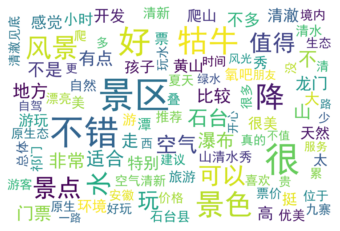

In [6]:
# 绘制词云
my_cloud = WordCloud(
    background_color="white",
    width = 900,
    height = 600,
    max_words = 100,
    font_path = 'simhei.ttf',
    max_font_size = 99,
    min_font_size = 16,
    random_state = 50
).generate_from_frequencies(word_counts)

plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
from wordcloud import WordCloud
import jieba
from collections import Counter
from imageio import imread
import matplotlib.pyplot as plt

# 获取文本内容
with open('../data/第六章数据/文本.txt', 'r', encoding='utf-8') as fp:
    content = fp.read()
words_temp = jieba.lcut(content)
words = []

# 读取停用词
with open("E:\MyCode\jupyterFile\数据可视化\data\第六章数据\stopwords2.txt", "r", encoding="utf-8") as fp:
    stopwords = [s.rstrip() for s in fp.readline()]

# 去掉切分词语中的停用词
for w in words_temp:
    if w not in stopwords:
        words.append(w)

frequency = dict(Counter(words))
font = "E:\MyCode\jupyterFile\数据可视化\data\第六章数据\WenDaoLingFeiXiaoKai-2.ttf"
mask_image = imread("E:\MyCode\jupyterFile\数据可视化\data\第六章数据\love.jpg")
wc = WordCloud(
    font_path = font,
    background_color="white",
    mask = mask_image,
)

wc.fit_words(frequency)

plt.imshow(wc)
plt.axis("off")
plt.show()

UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 31: illegal multibyte sequence